# **06. bubbleplot(버블 차트) 실습**
</br>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png">
</br>

* matplotlib 문법 관련 공식 문서 : https://matplotlib.org/stable/api/pyplot_summary.html
* seaborn scatterplot 문법 관련 공식 문서 : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## **PART1. 각종 세팅**

In [1]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)

작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [29]:
# 데이터 로드 및 정보 / 요약통계량 확인
df = pd.read_csv(path + r'\pfjan_FS_total.csv', encoding = 'cp949')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72537 entries, 0 to 72536
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   고객번호        72537 non-null  int64  
 1   지역          72537 non-null  object 
 2   업종대분류코드     72537 non-null  object 
 3   결산종료일       72537 non-null  object 
 4   BS_0005900  72537 non-null  int64  
 5   BS_0009100  72040 non-null  float64
 6   BS_0011300  72284 non-null  float64
 7   IS_0000100  72001 non-null  float64
 8   IS_0002700  72112 non-null  float64
 9   부채비율        71843 non-null  float64
 10  영업이익률       71767 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ MB


,고객번호,BS_0005900,BS_0009100,BS_0011300,IS_0000100,IS_0002700,부채비율,영업이익률
count,72537.00,72537.00,72040.00,72284.00,72001.00,72112.00,71843.00,71767.00
mean,64879120.68,4277.55,2716.26,1582.86,5930.99,157.70,424.06,-22.27
std,19552020.47,11768.97,7736.46,4724.97,15037.44,897.00,4329.19,687.62
min,22606.00,1.00,-12.00,-37670.00,-88.00,-68563.00,-272500.00,-88300.00
25%,63043732.00,693.00,394.00,182.75,854.00,16.00,69.59,0.99
50%,72286506.00,1699.00,971.00,600.00,2294.00,72.00,159.45,3.39
75%,75755678.00,4179.00,2528.00,1587.00,5720.00,202.00,307.57,6.87
max,88175300.00,527364.00,407843.00,252091.00,1216102.00,64362.00,371200.00,13900.00


### **(참고) 재무제표 계정과목 코드 의미**
* BS_0005900 : 자산총계
* BS_0009100 : 부채총계
* BS_0011300 : 자본총계
* IS_0000100 : 매출액
* IS_0002700 : 영업이익

In [3]:
# 상위 5개 관측치 확인
df.head(5)

,고객번호,수도권소재지기업구분지역명,업종대분류코드,결산종료일,BS_0005900,BS_0009100,BS_0011300,IS_0000100,IS_0002700,부채비율,영업이익률
0,22606,경북,C,2020-12-31,12686,10459.00,2227.00,10364.00,599.00,469.65,5.78
1,26819,경기,C,2020-12-31,194591,105178.00,89413.00,117551.00,13681.00,117.63,11.64
2,40811,충북,C,2020-12-31,26184,15348.00,10836.00,29878.00,1043.00,141.64,3.49
3,41357,충남,G,2020-12-31,266434,127775.00,138659.00,168286.00,597.00,92.15,0.35
4,43494,충북,C,2020-12-31,5768,4317.00,1451.00,7272.00,191.00,297.52,2.63


## **PART3. 데이터 집계**

* 주사업장소재지(시도)별로 부채비율, 영업이익률의 중위수와 업체수를 집계
    * 재무비율의 집계함수는 중위수(median) 사용
    * 업체수는 고객번호의 개수를 세는 방법 (count 함수) 사용
      
* pd.pivot_table()메서드의 aggfunc = 파라미터의 값으로 딕셔너리를 전달하면 컬럼별로 다른 함수 적용 가능
    * ex) aggfunc = {'컬럼명1' : '집계함수1', '컬럼명2' : '집계함수2'}
    * 참고) 주요 집계함수 종류:
        * sum (합계)
        * count (개수)
        * mean (평균)
        * median (중위수)
        * mode (최빈값)
        * std (표본표준편차)
        * var (표본분산)
        * min (최솟값)
        * max (최댓값)

In [28]:
df_agg = pd.pivot_table(data = df, index = ['지역'], 
                        values=['부채비율', '영업이익률', '고객번호'], 
                        aggfunc = {'부채비율' : 'median', '영업이익률' : 'median', '고객번호' : 'count'}).reset_index(drop= False)

# 컬럼명 변경
df_agg.rename({'고객번호' : '업체수'}, axis = 1, inplace = True)

# 업체수 많은 순서대로 정렬
df_agg.sort_values(by = '업체수', ascending= False, inplace = True)

# 업체수 하위 3개 지역 제거 
df_agg = df_agg[~df_agg['지역'].isin(['미상', '세종', '제주'])]

df_agg

,지역,업체수,부채비율,영업이익률
1,경기,20234,174.36,3.68
9,서울,14557,141.68,2.21
8,부산,5083,182.61,3.20
2,경남,4366,198.48,4.16
12,인천,4031,179.91,3.67
3,경북,3550,176.60,3.72
5,대구,3065,159.48,3.59
16,충남,2832,162.27,3.93
13,전남,2648,117.02,4.35
6,대전,2417,112.87,3.68


## **PART4. 그래프 생성**

In [30]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#### **PART4-1. 일반적인 산점도 행렬**

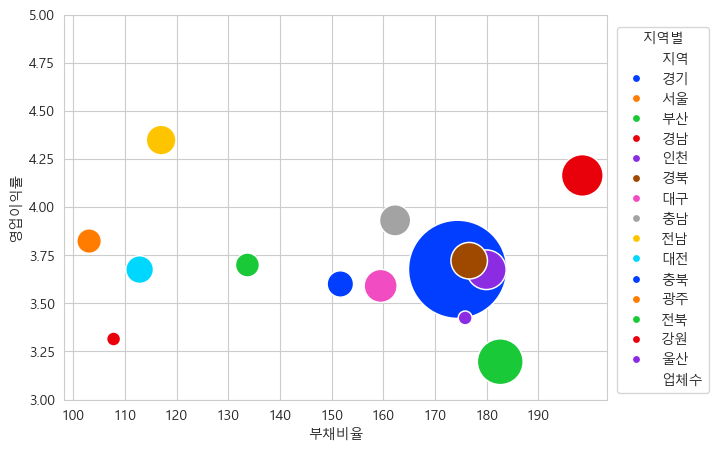

In [32]:
# 도화지 / 좌표계 / 그래프 객체 생성
fig = plt.figure(figsize = [7, 5])
ax = sns.scatterplot(data = df_agg, x = '부채비율', y = '영업이익률', size = '업체수', hue = '지역',
                     sizes = (100, 5000), legend = 'auto', palette = 'bright')
plt.xticks([i for i in range(100, 200, 10)])
plt.ylim(3, 5)

handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles[:-5], labels[:-5], loc='lower right', title = '지역별', bbox_to_anchor = (1.2, 0), ncol =1 )

#### **👉 영남권 업체의 경우 차입금이 많고 수익성이 나쁘고, 호남권 업체의 경우 차입금이 적고 수익성이 좋은 경향**
* 공단내 입지 여부, 자가 사업장 보유 여부 및 주요 업종 비중 등 추가적인 분석 가능